# Problem set 6
In this problem set we move from dynamics to pricing. We look at what the entire term structure of interest rates looks like, given a model for the short rate. 

--- 

### 1.a) Find expressions for ZCB prices, spot rates and forward rates.

*Purpose: If the short rate follows the Vasicek model, how do zero-coupon bond prices, spot rates, and forward rates depend on maturity?*

Everything in fixed income markets can be expressed in terms of ZCB prices. 

--- 

We consider the Vasicek short-rate model
$$
dr_t = (b - a r_t)\,dt + \sigma\,dW_t.
$$

In a short-rate model, the price at time $t$ of a zero-coupon bond maturing at $T$ is
$$
p(t,T) = \mathbb{E}_t^Q\!\left[\exp\!\left(-\int_t^T r_s\,ds\right)\right].
$$

---

### Affine term structure

The Vasicek model belongs to the class of affine term structure models. This implies that zero-coupon bond prices can be written in exponential–affine form as
$$
p(t,T) = \exp\!\left(A(t,T) - B(t,T)\,r_t\right),
$$
where $A(t,T)$ and $B(t,T)$ are deterministic functions.

Intuition: since the short rate follows a linear Gaussian process, expectations of exponentials of integrals of $r_t$ remain exponential and linear in the current short rate.

---

### ODEs for $A(t,T)$ and $B(t,T)$

For affine models, the functions $A(t,T)$ and $B(t,T)$ satisfy the system of ODEs
$$
B_t = -1 + aB, \qquad B(T,T)=0,
$$
$$
A_t = bB - \frac{1}{2}\sigma^2 B^2, \qquad A(T,T)=0.
$$

These equations follow from inserting the affine ansatz into the bond pricing PDE.

---

### Solving for $B(t,T)$

We solve the first-order linear ODE
$$
B_t - aB = -1.
$$

Multiplying by the integrating factor $e^{-at}$ gives
$$
\frac{d}{dt}\!\left(e^{-at}B(t,T)\right) = -e^{-at}.
$$

Integrating from $t$ to $T$ and using $B(T,T)=0$ yields
$$
B(t,T) = \frac{1}{a}\left(1 - e^{-a(T-t)}\right).
$$

Interpretation: the influence of the current short rate on bond prices decays exponentially with maturity due to mean reversion.

---

### Solving for $A(t,T)$

Given $B(t,T)$, we integrate
$$
A_t = bB - \frac{1}{2}\sigma^2 B^2
$$
from $t$ to $T$:
$$
A(t,T)
= -\int_t^T \left(b B(s,T) - \frac{1}{2}\sigma^2 B(s,T)^2\right) ds.
$$

Evaluating this integral leads to
$$
A(t,T)
= \frac{1}{4a^2}\Big(
2(\sigma^2 - 2ab)(T-t)
+ 2(2ab - \sigma^2)B(t,T)
- a\sigma^2 B(t,T)^2
\Big).
$$

---

### Spot rates

The continuously compounded spot rate is defined as
$$
R(t,T) = -\frac{\ln p(t,T)}{T-t}.
$$

Using the affine form of $p(t,T)$ gives
$$
R(t,T) = \frac{-A(t,T) + B(t,T)\,r_t}{T-t}.
$$

---

### Instantaneous forward rates

The instantaneous forward rate is defined by
$$
f(t,T) = -\frac{\partial}{\partial T}\ln p(t,T).
$$

Since $\ln p(t,T) = A(t,T) - B(t,T) r_t$, we obtain
$$
f(t,T) = A_T(t,T) - B_T(t,T)\,r_t.
$$

---

### Interpretation

In the Vasicek model, the entire term structure is an explicit function of the current short rate.  
The function $B(t,T)$ measures the sensitivity of bond prices to today’s short rate, while $A(t,T)$ captures the effects of the long-run mean and volatility. Mean reversion causes long-maturity rates to be less sensitive to the current short rate.


---

### Problem 1.b – Implementing Vasicek term structure functions

**Purpose**

The purpose of this exercise is to implement the closed-form expressions for zero-coupon bond prices, spot rates, and instantaneous forward rates in the Vasicek model. By coding these formulas, we can directly see how the entire term structure depends on the model parameters and the current short rate.

**Intuition**

From Problem 1.a we learned that once the short rate follows the Vasicek model, bond prices have an exponential–affine form. This means that spot rates and forward rates are not new objects, but simple transformations of the same bond price formula. Implementing them in Python allows us to visualize how mean reversion and volatility shape the yield curve.



In [7]:
import numpy as np
import fixed_income_derivatives_E2025 as fid
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

## ZCB price function in Vasicek model

def vasicek_zcb_price(T, r, a, b, sigma):
    """
    Returns the zero-coupon bond price p(0,T)
    in the Vasicek model.
    """
    B = (1/a) * (1 - np.exp(-a * T))
    
    A = (1/(4*a**2)) * (
        2*(sigma**2 - 2*a*b)*T
        + 2*(2*a*b - sigma**2)*B
        - a*sigma**2 * B**2
    )
    
    return np.exp(A - B * r)

## Spot rate function in Vasicek model
def vasicek_spot_rate(T, r, a, b, sigma):
    """
    Returns the continuously compounded
    spot rate R(0,T).
    """
    p = vasicek_zcb_price(T, r, a, b, sigma)
    return -np.log(p) / T

## Instantaneous forward rate function in Vasicek model
def vasicek_forward_rate(T, r0, a, b, sigma):
    return (
        (sigma**2 / (2*a**2)) * (1 - np.exp(-a*T))**2
        + (b/a) * (1 - np.exp(-a*T))
        + r0 * np.exp(-a*T)
    )




**Interpretation** 

All three functions describe the same underlying object: the term structure implied by the Vasicek model.  
- Zero-coupon bond prices are the most fundamental quantities, while spot and forward rates are simply different ways of expressing the same information.  

- Mean reversion limits the influence of the current short rate on long maturities, which is why long-term rates are smoother and less volatile than short-term rates.


### Problem 1.c – Plotting spot and forward rate term structures

**Purpose**

The purpose of this exercise is to visualize the term structures of spot rates and forward rates implied by the Vasicek model. By plotting both curves as functions of maturity, we can see how mean reversion and the long-run level determine the shape of the yield curve.



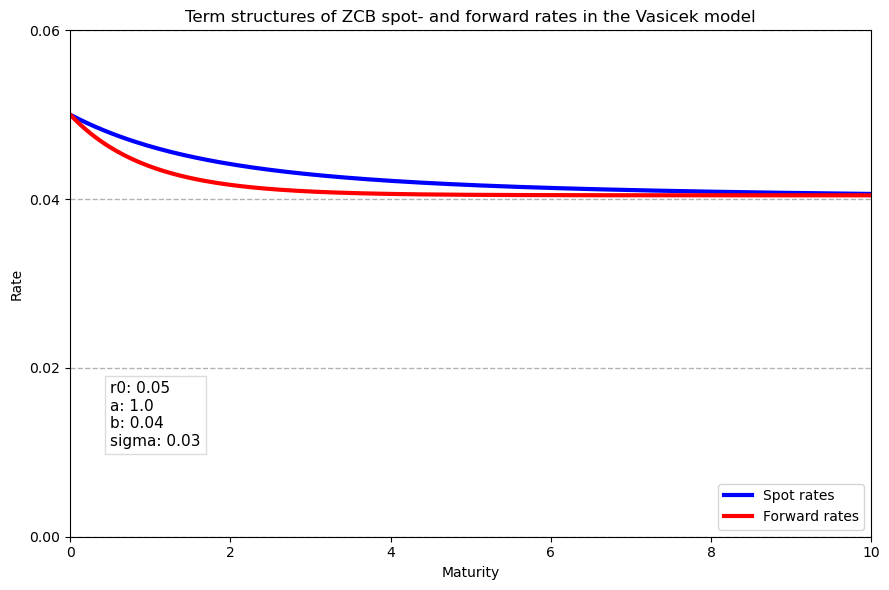

In [10]:
# Parameters (chosen to match the figure)
r0 = 0.05
a = 1.0
b = 0.04
sigma = 0.03

T_max = 10
T_grid = np.linspace(0.01, T_max, 200)

# Compute spot and forward rates
spot_rates = np.array([vasicek_spot_rate(T, r0, a, b, sigma) for T in T_grid])
forward_rates = np.array([vasicek_forward_rate(T, r0, a, b, sigma) for T in T_grid])

# Plot with correct grid and axis formatting
plt.figure(figsize=(9,6))

plt.plot(T_grid, spot_rates, 'b', linewidth=3, label="Spot rates")
plt.plot(T_grid, forward_rates, 'r', linewidth=3, label="Forward rates")

# Horizontal reference lines every 0.02
y_ticks = np.arange(0, 0.061, 0.02)
for y in y_ticks:
    plt.axhline(y, color='gray', linestyle='--', linewidth=1, alpha=0.6)

# Axis limits and ticks
plt.xlim(0, T_max)          # <-- start x-axis at 0
plt.ylim(0, 0.06)

plt.yticks(y_ticks)

plt.xlabel("Maturity")
plt.ylabel("Rate")
plt.title("Term structures of ZCB spot- and forward rates in the Vasicek model")

plt.legend(loc="lower right")

# Parameter box
textstr = (
    f"r0: {r0}\n"
    f"a: {a}\n"
    f"b: {b}\n"
    f"sigma: {sigma}"
)
plt.gca().text(
    0.05, 0.18, textstr,
    transform=plt.gca().transAxes,
    fontsize=11,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='lightgray')
)

plt.grid(False)
plt.tight_layout()
plt.show()
